In [1]:
import sys
sys.path.append("../dev_scripts/")
import exp_tools
import sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np
from fri import bounds,plot_dendrogram_and_intervals
from fri import *
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
n = 5000

In [3]:
rs = np.random.RandomState(125)

In [4]:
X,y = exp_tools.gen_quadrant_pair(n=n,random_state=rs)
X = StandardScaler().fit_transform(X)

2500 0


In [5]:
X2,y2 = genClassificationData(n_samples=n,n_features=2,n_strel=1,n_redundant=0,random_state=rs)
X2 = StandardScaler().fit_transform(X2)

Generating dataset with d=2,n=5000,strongly=1,weakly=0, partition of weakly=None


In [6]:
y_and = np.where(y == y2,1,-1)

In [7]:
#y_and = y==y2

In [8]:
sum(y2==1)

2466

In [9]:
X_and = np.hstack([X,X2])
X_and = StandardScaler().fit_transform(X_and)

In [10]:
f = FRIClassification(debug=True,optimum_deviation=0.1,C=10)

f.fit(X_and,y_and)

loss 4959.99929987
L1 0.873467818155
offset -0.012627032805770304
C 10
score 0.506077795786
coef:
[[-0.19322487]
 [ 0.13293622]
 [ 0.06931401]
 [-0.39858654]]


In [103]:
f.interval_

array([[ 0.28705084,  0.72354474],
       [ 0.27645526,  0.71294916],
       [ 0.        ,  0.0588904 ],
       [ 0.        ,  0.05458227]])

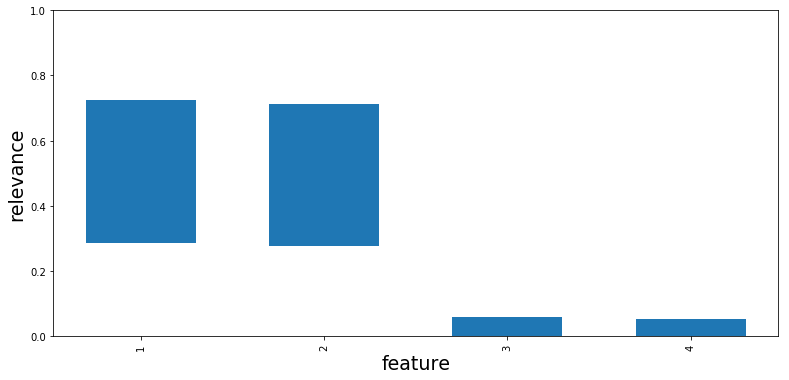

In [104]:
p = plotIntervals(f.interval_)

In [131]:
clust, link, feat_points,dist_mat = f.community_detection2(X_and,y_and)


AssertionError: 

In [ ]:
import scipy
dist_mat = scipy.spatial.distance.squareform(dist_mat)

In [ ]:
p = plot_dendrogram_and_intervals(f.interval_,link)

In [25]:
import pandas as pd
pd.DataFrame(X_and).corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.029358,-0.026530,0.005823,0.005823,0.007024,0.030354,-0.011977
1,0.029358,1.000000,-0.019113,0.012717,0.012717,0.002813,0.012644,-0.010980
2,-0.026530,-0.019113,1.000000,0.088419,0.088419,-0.003573,-0.010695,0.043662
3,0.005823,0.012717,0.088419,1.000000,1.000000,0.041654,-0.012327,-0.008724
4,0.005823,0.012717,0.088419,1.000000,1.000000,0.041654,-0.012327,-0.008724
5,0.007024,0.002813,-0.003573,0.041654,0.041654,1.000000,0.035417,-0.011214
6,0.030354,0.012644,-0.010695,-0.012327,-0.012327,0.035417,1.000000,-0.036886
7,-0.011977,-0.010980,0.043662,-0.008724,-0.008724,-0.011214,-0.036886,1.000000


In [26]:
import seaborn as sns

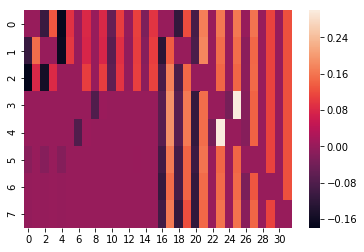

In [27]:
sns.heatmap(feat_points)

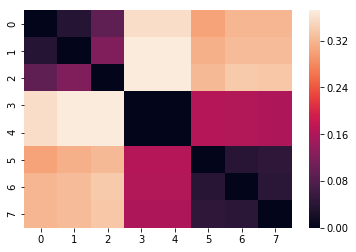

In [32]:
sns.heatmap(dist_mat)